In [24]:
%load_ext autoreload
%autoreload 2
import HammingCode
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc
import NeuralNetworkCorrection as network
import Autoencoder
import Utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# tamanho da amostra
tamanho = 1e8
variancia = 1
code_rate = 4/7
# amostra
tamanho_amostra = 10**3
Eb_dB_values = np.arange(-2, 11, 1)

# ML data

# Gerar dados de treinamento
word_length = 4 # Tamanho padrão da entrada do hamming
training_sample_length = 10 **3
epoches = 200
training_noisy_data = []
training_original_data = []
batch_size = 16



In [26]:
training_data = {
    'original': [],
    'noisy': [],
    'info': []
}
training_information = network.get_training_data_set(training_sample_length)

for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(training_information, eb_db + 10*np.log10(code_rate), variancia)
    training_data['info'].append(info)
    training_data['noisy'].extend(info['split_encoded_data'])
    training_data['original'].extend(info['split_original_data'])

training_data['original'] = np.array(training_data['original'])
training_data['noisy'] = np.array(training_data['noisy'])


In [27]:
# Criar e treinar a rede neural
#model = network.train_neural_network(training_data, epoches, batch_size)

In [28]:
#autoencoder = Autoencoder.create_and_train_auto_encoder(training_data, epoches, batch_size)


In [29]:
# Gerar dados de teste
amostras_ruidosas = []
amostras_originais = []
ML_result = []
tradicional_result = []
autoencoder_result = []


In [30]:
test_data = {
    'original': [],
    'info': []
}
test_sample_length = 10 ** 3
test_information = network.get_training_data_set(test_sample_length)

for eb_db in Eb_dB_values:
    info = network.generate_data_for_training(test_information, eb_db + 10*np.log10(code_rate), variancia)
    test_data['info'].append(info)
    test_data['original'] = info['original_data']

In [31]:
i = 0
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))

In [32]:
i = 1
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [33]:
i = 2
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [34]:
i = 3
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [35]:
i = 4
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [36]:
i = 5
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [37]:
i = 6
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [38]:
i = 7
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [39]:
i = 8
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [40]:
i = 9
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [41]:
i = 10
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [42]:
i = 11
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [43]:
i = 12
#autoencoder_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], autoencoder))
#ML_result.append(network.decode_and_correct(test_data['info'][i]['split_encoded_data'], model))


In [44]:
for i in test_data['info']:
    tradicional_result.append(HammingCode.decode_sample(i['split_encoded_data']))

In [48]:
BER_tradicional = []
BER_autoencoder = []
BER_ML = []
for i in range(0, len(Eb_dB_values)):
 #   BER_ML.append(np.sum(np.array(ML_result[i]).astype(int) != test_data['original']) / len(test_data['original']))
    BER_tradicional.append(np.sum(np.array(tradicional_result[i]).astype(int) != test_data['original']) / len(test_data['original']))
    #BER_autoencoder.append(np.sum(np.array(autoencoder_result[i]).astype(int) != test_data['original']) / len(test_data['original']))

def adjust_ber(snr):
    adjusted_values = []
    for value in snr:
        correction = value * code_rate
        adjusted_values.append(np.sqrt(correction))
        
    return adjusted_values

#BER_ML = adjust_ber(BER_ML)
#BER_tradicional = adjust_ber(BER_tradicional)
#BER_autoencoder = adjust_ber(BER_autoencoder)

# Calcular a BER teórica
Eb_coded = np.array([eb_db + 10*np.log10(code_rate) for eb_db in Eb_dB_values])
Eb_values = 10**(Eb_coded/10)
BER_teorica = 0.5 * erfc(np.sqrt(Eb_values))

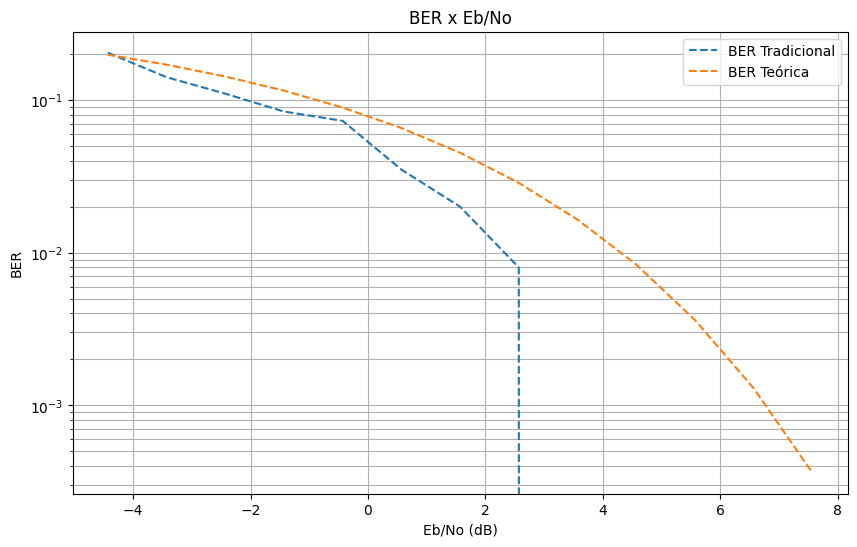

In [50]:
# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
plt.semilogy(Eb_coded, BER_tradicional, linestyle = '--', label='BER Tradicional')
#plt.semilogy(Eb_dB_values, BER_autoencoder, linestyle = '--', label='BER Autoencoder')
#plt.semilogy(Eb_dB_values, BER_ML, linestyle = '--', label='BER MLP')
plt.semilogy(Eb_coded, BER_teorica, linestyle='--', label='BER Teórica')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER x Eb/No')
plt.show()